#  Multiple Linear Regression assignment

## Car pricing  case study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and 
producing cars locally to give competition to their US and European counterparts. 

The company wants to know:
 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Data Reading and Understanding

In [2]:
# Read the input data set
car_pricing_df = pd.read_csv("CarPrice_Assignment.csv", encoding='utf-8')
car_pricing_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# To get the shape of the dataset
car_pricing_df.shape

(205, 26)

In [4]:
car_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# To get the summary statistics
car_pricing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
# To check the % missing values in dataset
missing_values = round(100*(car_pricing_df.isnull().sum()/len(car_pricing_df)), 2)
missing_values

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

#####  Observed that there are no missing values in the dataset

### Data Visualization

#### Univariate analysis

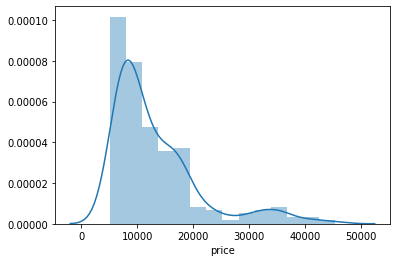

In [7]:
# To view the distribution plot of target variable
sns.distplot(car_pricing_df.price)
plt.show()

The prices of the cars are right skewed. Majority of the cars are having less then 20K.

#### Bivariate analysis

In [8]:
# list of numeric variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', \
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

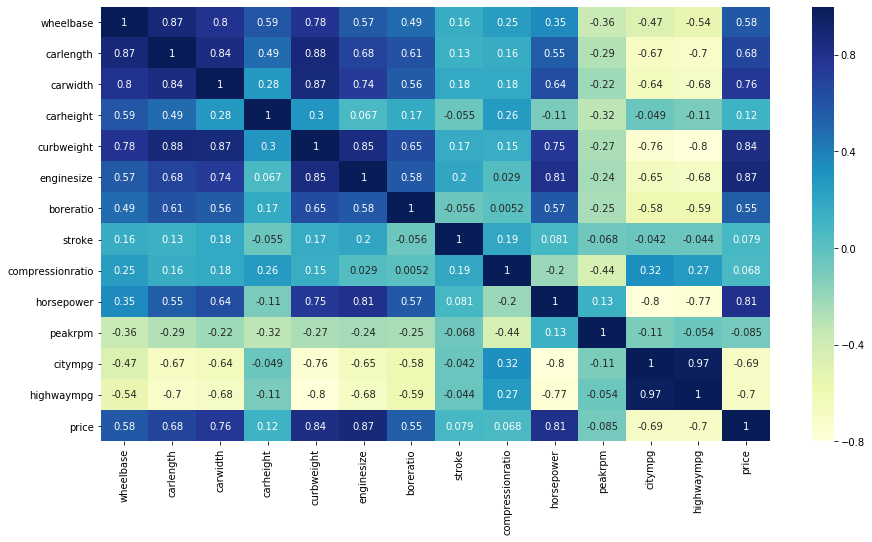

In [9]:
# To plot the numerical variables
fig, ax = plt.subplots(figsize=(15, 8))
corr = car_pricing_df[num_vars].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, cmap="YlGnBu", annot=True)
bottom, top = plt.ylim()
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top) 
plt.show()

Observations:
    1. Price is having high positive correlation with enginesize, curbweight, horsepower, carwidth.
    2. Price is having negative correlation with highwaympg and citympg.

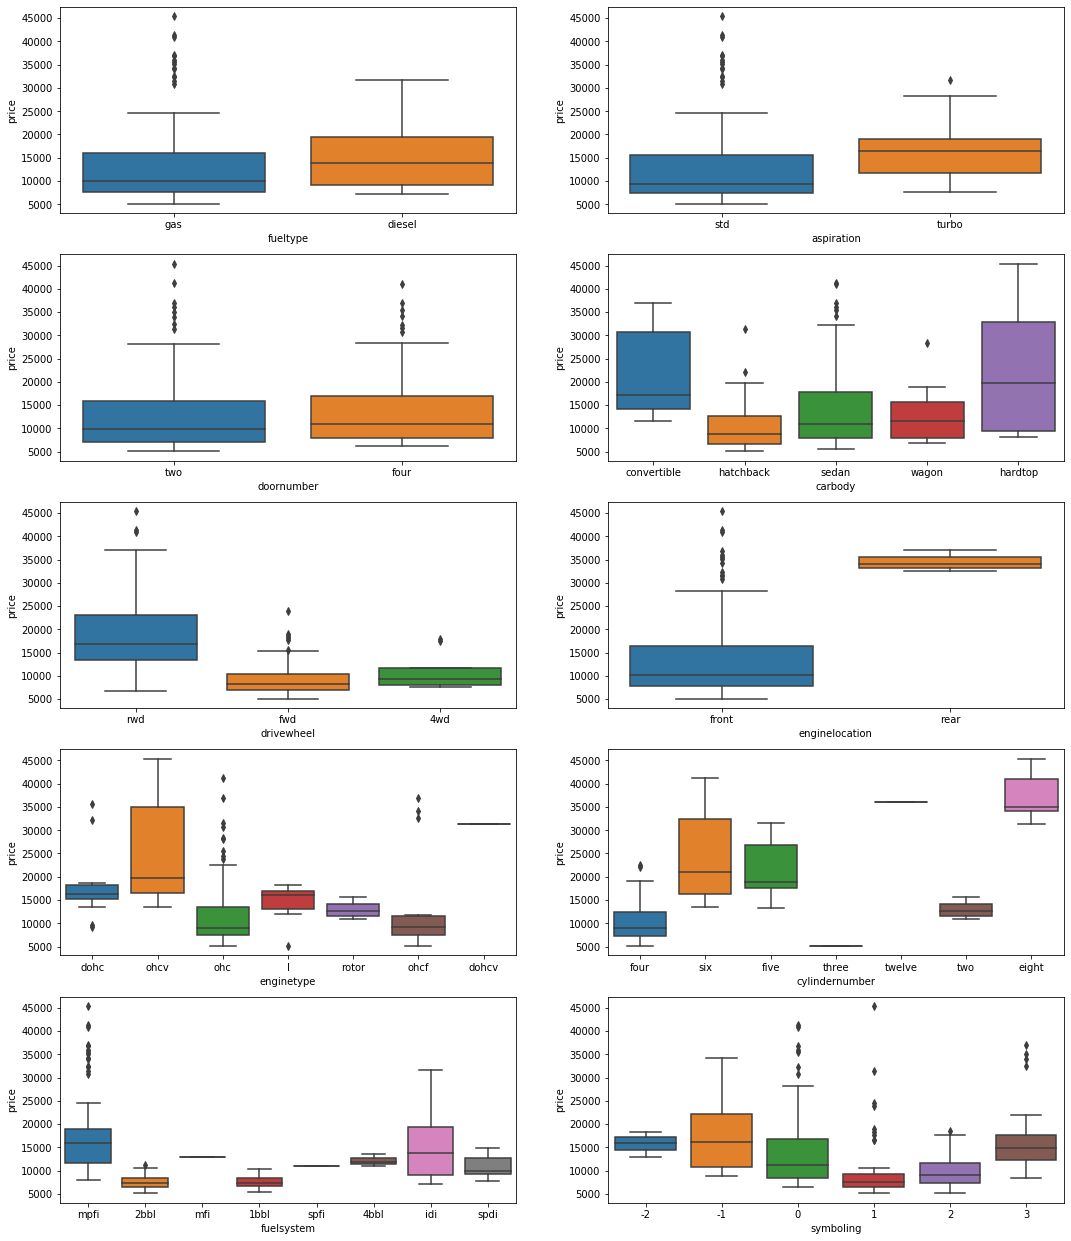

In [10]:
# To visualise the categorical variables. 
plt.figure(figsize=(18, 22))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pricing_df)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_pricing_df)
plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pricing_df)
plt.subplot(5,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing_df)
plt.subplot(5,2,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing_df)
plt.subplot(5,2,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pricing_df)
plt.subplot(5,2,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing_df)
plt.subplot(5,2,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pricing_df)
plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing_df)
plt.subplot(5,2,10)
sns.boxplot(x = 'symboling', y = 'price', data = car_pricing_df)
plt.show()

Observations:
    1. The average price of diesel cars is more than gas fuel type.
    2. The average price of cars with aspiration turbo is more than std.
    3. There is very little variation in price with cars having door 2 and 4.
    4. The average price of cars with carbody hardtop and convertible are having high which is above 15K.
    5. The average price of cars with drivewheel rwd are high.
    6. There are very less number of cars with engine location rear and the average price is high.
    7. The average price of ohcv and dohcv are high. We can't get much insights on dohcv as there are very minimal records.
    8. The average price of cars with cylindernumber 8 and 12 are high. We can't get much insights on twelve as there are very minimal records.
    9. The average price of cars with fuelsystem mpfi and idi are high.
    10. The average price of cars with symboling -1, -2 and 3 are high.

### Data Preparation

In [11]:
# To extract company name from the column CarName
car_pricing_df['CarCompanyName'] = car_pricing_df['CarName'].str.split().str.get(0)

In [12]:
# To check the count of unique values after replace
len(car_pricing_df.CarCompanyName.unique())

28

In [13]:
# To list the unique carcompanyname values
car_pricing_df.CarCompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Could observe there are few car company names having misspelled. Causing 2 different entries. 
#### Like Nissan vs nissan, porsche vs porcshce, ....
#### We need to replace the actual value with misspelled.

In [14]:
# To replace actual values with misspelled 
car_pricing_df = car_pricing_df.replace({'CarCompanyName': {'maxda':'mazda', 'Nissan':'nissan', \
                         'vw':'volkswagen', 'vokswagen':'volkswagen', 'porcshce':'porsche', 'toyouta':'toyota'}})

In [15]:
# To check the count of unique values after replace
len(car_pricing_df.CarCompanyName.unique())

22

In [16]:
# To list the unique carcompanyname values
car_pricing_df.CarCompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

We can now drop the CarName column which is not required in our analysis.

In [17]:
# To drop the CarName column
car_pricing_df.drop('CarName',axis=1,inplace=True)

#### Dummy Variables

The derived variable CarCompanyName has 22 unique values. We can create 21 dummy variables from this.

In [18]:
# To create dummy variables and drop the first column from Carcompany df using 'drop_first = True'
Carcompany_df = pd.get_dummies(car_pricing_df['CarCompanyName'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, Carcompany_df], axis = 1)

To create dummy variables from categorical features

In [19]:
# To create dummy variables and drop the first column from carbody df using 'drop_first = True'
carbody_df = pd.get_dummies(car_pricing_df['carbody'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, carbody_df], axis = 1)

In [20]:
# To create dummy variables and drop the first column from drivewheel df using 'drop_first = True'
drivewheel_df = pd.get_dummies(car_pricing_df['drivewheel'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, drivewheel_df], axis = 1)

In [21]:
# To create dummy variables and drop the first column from fuelsystem df using 'drop_first = True'
fuelsystem_df = pd.get_dummies(car_pricing_df['fuelsystem'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, fuelsystem_df], axis = 1)

In [22]:
# To create dummy variables and drop the first column from enginetype df using 'drop_first = True'
enginetype_df = pd.get_dummies(car_pricing_df['enginetype'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, enginetype_df], axis = 1)

In [23]:
# Now let's see the head of our dataframe.
car_pricing_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,0,0,0,0,0,0,0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,0,0,0,0,0,0,0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,1,0,0,0,0,0,0,1,0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0


In [24]:
# To drop the original columns after creating dummy variables
car_pricing_df.drop('CarCompanyName',axis=1,inplace=True)
car_pricing_df.drop('carbody',axis=1,inplace=True)
car_pricing_df.drop('drivewheel',axis=1,inplace=True)
car_pricing_df.drop('enginetype',axis=1,inplace=True)
car_pricing_df.drop('fuelsystem',axis=1,inplace=True)

#### Label encoding

There are 4 columns having 2 unique values for which the label encoding can be performed.

In [25]:
# To perform label encoding and create new columns to represent the values
car_pricing_df['fueltype_gas'] = car_pricing_df['fueltype'].map({'gas':1, 'diesel':0})
car_pricing_df['aspiration_std'] = car_pricing_df['aspiration'].map({'std':1, 'turbo':0})
car_pricing_df['doornumber_two'] = car_pricing_df['doornumber'].map({'two':1, 'four':0})
car_pricing_df['enginelocation_front'] = car_pricing_df['enginelocation'].map({'front':1, 'rear':0})

In [26]:
# To drop the old columns before label encoding
car_pricing_df.drop('fueltype',axis=1,inplace=True)
car_pricing_df.drop('aspiration',axis=1,inplace=True)
car_pricing_df.drop('doornumber',axis=1,inplace=True)
car_pricing_df.drop('enginelocation',axis=1,inplace=True)

In [27]:
# To drop the car_ID as it contains unique id of each observation
car_pricing_df.drop('car_ID',axis=1,inplace=True)

In [28]:
car_pricing_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [29]:
# To perform label encoding on cylindernumber column having multiple unique values
cylinder_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
car_pricing_df['cylindernumber'] = car_pricing_df['cylindernumber'].map(cylinder_dict)

In [30]:
car_pricing_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,dohcv,l,ohc,ohcf,ohcv,rotor,fueltype_gas,aspiration_std,doornumber_two,enginelocation_front
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,1,1,1,1
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,1,1,1,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,1,0,1,1,1,1
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,1,0,0,0,1,1,0,1
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,1,0,0,0,1,1,0,1


In [31]:
# To check for duplicate records
car_pricing_df.loc[car_pricing_df.duplicated()]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,dohcv,l,ohc,ohcf,ohcv,rotor,fueltype_gas,aspiration_std,doornumber_two,enginelocation_front


Observation is that there are no duplicate records.

#### Derived variables

In [32]:
# The price of the cars can be binned.
bins = [5000, 10000, 20000, 46000]
car_labels = ['Low', 'Medium', 'High']
car_pricing_df['car_range'] = pd.cut(car_pricing_df['price'], bins=bins, right=False, labels=car_labels)

In [33]:
# To create dummy variables and drop the first column from enginetype df using 'drop_first = True'
car_range_df = pd.get_dummies(car_pricing_df['car_range'], drop_first = True)

# Add the results to the original car_pricing_df dataframe
car_pricing_df = pd.concat([car_pricing_df, car_range_df], axis = 1)
car_pricing_df.drop('car_range',axis=1,inplace=True)

### Model building

#### Split the data into train and test set

In [34]:
# To split the data into train and test set, having random state set to a value to get same set of data every time we run.

df_train, df_test = train_test_split(car_pricing_df, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Rescaling features

In [35]:
# To normalize the train set using minmax scaling technique
scaler = MinMaxScaler()

In [36]:
num_vars_p = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', \
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [37]:
# To apply scaler to all the features except dummy variables and label encoding variables.
df_train[num_vars_p] = scaler.fit_transform(df_train[num_vars_p])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,ohc,ohcf,ohcv,rotor,fueltype_gas,aspiration_std,doornumber_two,enginelocation_front,Medium,High
3,2,0.455172,0.577236,0.491667,0.541667,0.329325,4,0.181132,0.404762,0.611111,...,1,0,0,0,1,1,0,1,1,0
157,0,0.313793,0.409756,0.341667,0.416667,0.240884,4,0.139623,0.404762,0.424242,...,1,0,0,0,1,1,0,1,0,0
81,3,0.334483,0.518699,0.425000,0.133333,0.325834,4,0.230189,0.531746,0.641414,...,1,0,0,0,1,1,1,1,0,0
32,1,0.244828,0.144715,0.308333,0.400000,0.135376,4,0.067925,0.182540,0.444444,...,1,0,0,0,1,1,1,1,0,0
99,0,0.365517,0.525203,0.408333,0.575000,0.324282,4,0.222642,0.515873,0.646465,...,1,0,0,0,1,1,0,1,0,0


#### Dividing the dependent and independent variables from train set

In [38]:
# To split X and Y variables
y_train = df_train.pop('price')
X_train = df_train

In [39]:
# To build the model
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('wheelbase', False, 17),
 ('carlength', False, 24),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('cylindernumber', False, 21),
 ('enginesize', False, 8),
 ('boreratio', False, 19),
 ('stroke', False, 11),
 ('compressionratio', False, 6),
 ('horsepower', True, 1),
 ('peakrpm', False, 9),
 ('citympg', False, 4),
 ('highwaympg', False, 40),
 ('audi', False, 51),
 ('bmw', True, 1),
 ('buick', False, 43),
 ('chevrolet', False, 26),
 ('dodge', False, 25),
 ('honda', False, 27),
 ('isuzu', False, 32),
 ('jaguar', False, 28),
 ('mazda', False, 35),
 ('mercury', False, 50),
 ('mitsubishi', False, 15),
 ('nissan', False, 33),
 ('peugeot', True, 1),
 ('plymouth', False, 23),
 ('porsche', False, 39),
 ('renault', False, 29),
 ('saab', False, 18),
 ('subaru', False, 12),
 ('toyota', False, 31),
 ('volkswagen', False, 34),
 ('volvo', False, 30),
 ('hardtop', True, 1),
 ('hatchback', False, 2),
 ('sedan', False, 3),
 ('wagon', True, 1),
 

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'bmw', 'peugeot', 'hardtop',
       'wagon', 'l', 'enginelocation_front', 'High'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.20e-88
Time:                        17:56:57   Log-Likelihood:                -1468.6
No. Observations:                 164   AIC:                             2959.
Df Residuals:                     153   BIC:                             2993.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.418e+04 

In [46]:
X_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'horsepower', 'bmw', 'peugeot',
       'hardtop', 'wagon', 'l', 'enginelocation_front', 'High'],
      dtype='object')

In [47]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,34.60
1,curbweight,33.70
8,enginelocation_front,13.14
4,peugeot,11.05
7,l,9.73
2,horsepower,8.66
9,High,3.09
3,bmw,1.39
6,wagon,1.36
5,hardtop,1.06


Remove the carwidth as it has the high VIF.

In [49]:
X_train_rfe = X_train_rfe.drop(['carwidth'], axis=1)

### Model 2

In [50]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.75e-86
Time:                        17:56:58   Log-Likelihood:                -1475.9
No. Observations:                 164   AIC:                             2972.
Df Residuals:                     154   BIC:                             3003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.362e+04 

In [51]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,23.62
3,peugeot,10.54
6,l,9.42
1,horsepower,8.59
7,enginelocation_front,7.57
8,High,2.83
5,wagon,1.34
2,bmw,1.29
4,hardtop,1.05


Remove the curbweight column as it has high VIF.

In [52]:
X_train_rfe = X_train_rfe.drop(['curbweight'], axis=1)

### Model 3

In [53]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.31e-68
Time:                        17:56:59   Log-Likelihood:                -1524.5
No. Observations:                 164   AIC:                             3067.
Df Residuals:                     155   BIC:                             3095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8897.4723 

In [54]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,peugeot,9.19
5,l,9.17
0,horsepower,4.12
6,enginelocation_front,3.06
7,High,2.06
1,bmw,1.27
4,wagon,1.20
3,hardtop,1.04


Removing the l feature as it has high p-value and VIF.

In [55]:
X_train_rfe = X_train_rfe.drop(['l'], axis=1)

### Model 4

In [56]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.60e-69
Time:                        17:56:59   Log-Likelihood:                -1524.5
No. Observations:                 164   AIC:                             3065.
Df Residuals:                     156   BIC:                             3090.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8875.1818 

In [57]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.07
5,enginelocation_front,3.01
6,High,2.06
1,bmw,1.27
4,wagon,1.20
2,peugeot,1.09
3,hardtop,1.04


Removing wagon as the p-value is high.

In [58]:
X_train_rfe = X_train_rfe.drop(['wagon'], axis=1)

### Model 5

In [59]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.74e-70
Time:                        17:57:00   Log-Likelihood:                -1524.9
No. Observations:                 164   AIC:                             3064.
Df Residuals:                     157   BIC:                             3086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8943.2421 

In [60]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.07
4,enginelocation_front,2.85
5,High,2.06
1,bmw,1.26
2,peugeot,1.06
3,hardtop,1.04


Removing hardtop column as the p-value is high.

In [61]:
X_train_rfe = X_train_rfe.drop(['hardtop'], axis=1)

### Model 6

In [62]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.62e-71
Time:                        17:57:00   Log-Likelihood:                -1525.4
No. Observations:                 164   AIC:                             3063.
Df Residuals:                     158   BIC:                             3081.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8237.6184 

In [63]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.00
3,enginelocation_front,2.85
4,High,2.06
1,bmw,1.26
2,peugeot,1.06


Removing enginelocation_front column as p-value is high.

In [64]:
X_train_rfe = X_train_rfe.drop(['enginelocation_front'], axis=1)

### Model 7

In [65]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.12e-72
Time:                        17:57:00   Log-Likelihood:                -1526.1
No. Observations:                 164   AIC:                             3062.
Df Residuals:                     159   BIC:                             3078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5769.3855    372.231     15.499      0.0

In [66]:
# To drop the constant or error term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,High,1.87
0,horsepower,1.67
1,bmw,1.25
2,peugeot,1.05


Eventhough the p-value of bmw columns is 0.088, the VIF is low 1.25 so we can keep the column as we have good Adjusted R-square value overall.

### Residual Analysis of model

In [67]:
X_train_lm = sm.add_constant(X_train_rfe)
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

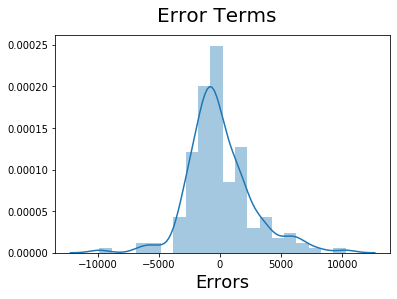

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms are normally distributed.

### Making predictions

Applying scales on the test set

In [69]:
df_test[num_vars_p] = scaler.transform(df_test[num_vars_p])

#### Dividing into X_test and y_test

In [70]:
# To split X and y variables
y_test = df_test.pop('price')
X_test = df_test

In [71]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

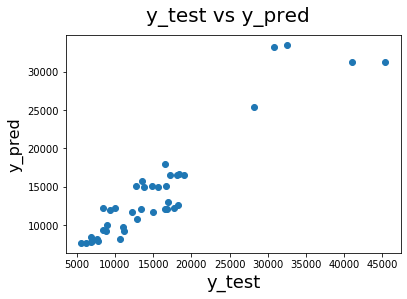

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Prediction accuracy

In [74]:
# To calculate the R-squared score on the test set.
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8337752906397491

### I could achieve 83.3% accuracy from the model built.

Inference from the model:
    1. 88% of the variance is explained by the model, R-squared 88% and Adj R-Squared 87.6%
    2. Prob(F-statistic) is 6.12e-72 which is less than 0.05 and close to zero so the overall model is significant.
    3. P-value of all the predictors are less than 0.05 except the bmw which little high (0.088) so predictors are statistically significant.